In [1]:
#Exploratory Data Analysis on Airbnbs in Dublin 2022

#Objective: 
# To explore the dataset, identify the number of listings according to area, and to determine how prices are related to factors such as property type, 
# area, and number of guests it can accommodate.

# Data Understanding – Is the data complete and reliable?
# Data Cleaning – Preprocessing data for EDA, cleaning and proper formatting 
# Data Visualization - Visualizing key insights


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#reading the csv file and checking the shape of the df
listings = pd.read_csv('dub_listings.csv')
print(listings.shape)
listings.head(5)

(7064, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6509140,https://www.airbnb.com/rooms/6509140,20220608163058,2022-06-08,2 Cosy 2BD at Charming DUB Suburbs,Two cosy double bedrooms in a 4 Bed Room detac...,It's a very quiet family neighborhood within w...,https://a0.muscache.com/pictures/81852212/e550...,30272260,https://www.airbnb.com/users/show/30272260,...,5.00,4.67,4.52,NaN,f,5,0,4,1,0.33
1,35726540,https://www.airbnb.com/rooms/35726540,20220608163058,2022-06-08,En-suite Double Room in Business Location,Large bedroom with private bathroom located 20...,Safe and clean neighbourhood. Ringsend is one ...,https://a0.muscache.com/pictures/4fdac1c0-677a...,266123186,https://www.airbnb.com/users/show/266123186,...,4.78,4.81,4.76,NaN,t,5,2,3,0,1.09
2,11275684,https://www.airbnb.com/rooms/11275684,20220608163058,2022-06-08,Large Double With Kingsize Bed,We live in a lovely detached dormer bungalow i...,Walking distance to Intel. 4 mins walk from bu...,https://a0.muscache.com/pictures/9e83ea72-63a5...,58881076,https://www.airbnb.com/users/show/58881076,...,4.94,4.71,4.82,NaN,f,3,0,3,0,0.23
3,18790387,https://www.airbnb.com/rooms/18790387,20220608163058,2022-06-08,Unique Country Home in Enniskerry - Green Room,"If you are a walker, wedding guest, golfer, cy...",Our house is 300 metres from the centre of Enn...,https://a0.muscache.com/pictures/2f037011-5e32...,89472426,https://www.airbnb.com/users/show/89472426,...,4.94,4.97,4.87,NaN,f,3,0,3,0,1.16
4,49559940,https://www.airbnb.com/rooms/49559940,20220608163058,2022-06-08,"Seafront apartment, Clontarf, Dublin 3","Seafront apartment, top floor of 3 story perio...","Simply an outstanding location, sea views, bea...",https://a0.muscache.com/pictures/d7656337-bcc3...,32298580,https://www.airbnb.com/users/show/32298580,...,5.00,4.74,4.53,NaN,f,1,1,0,0,1.67


In [5]:
#Cleaning the dataset

# Notice that the 'bathrooms' column is empty. While 'bathrooms_text' gives us the information we need,
# it is better to keep the number and type of bathrooms seperate from each other. I'll use the split function to do the same:
listings["bathrooms_qty"] = listings["bathrooms_text"].str.split(" ", expand=True)[0]
listings["bathroom_type"] = listings["bathrooms_text"].str.split(" ", expand=True)[1]

In [6]:
#For this EDA, the variables of interest are as follows:
listings[['price','host_response_rate','host_acceptance_rate','bathrooms_text', 'bathrooms_qty', 'bathroom_type', 'neighbourhood','neighbourhood_cleansed', 'room_type']].head(5) 

,price,host_response_rate,host_acceptance_rate,bathrooms_text,bathrooms_qty,bathroom_type,neighbourhood,neighbourhood_cleansed,room_type
0,$116.00,100%,29%,1 shared bath,1,shared,"Ashbourne, Meath, Ireland",Fingal,Private room
1,$100.00,100%,100%,1 private bath,1,private,"Dublin 4, County Dublin, Ireland",Dublin City,Private room
2,$55.00,96%,63%,1 shared bath,1,shared,"Leixlip, Kildare, Ireland",South Dublin,Private room
3,$100.00,100%,78%,1.5 shared baths,1.5,shared,"Enniskerry, County Wicklow, Ireland",Dn Laoghaire-Rathdown,Private room
4,$220.00,100%,96%,1 bath,1,bath,"Dublin 3, County Dublin, Ireland",Dublin City,Entire home/apt


In [7]:
# While exploring the dataset in a spreadsheet I noticed that price, host acceptance rate, and host response rate columns have the type object.
listings[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [8]:
# Since I need them in numerical format for my analysis, I'll remove the special characters and change the listed columns to the appropriate
# data types using the astype function as follows:
listings["price"] = listings["price"].str[1:].str.replace(",","").astype("float")
listings["host_response_rate"] = listings["host_response_rate"].str[:-1].astype("float") / 100
listings["host_acceptance_rate"] = listings["host_acceptance_rate"].str[:-1].astype("float") / 100

In [24]:
listings[
    ["price"]
].dtypes

price    float64
dtype: object

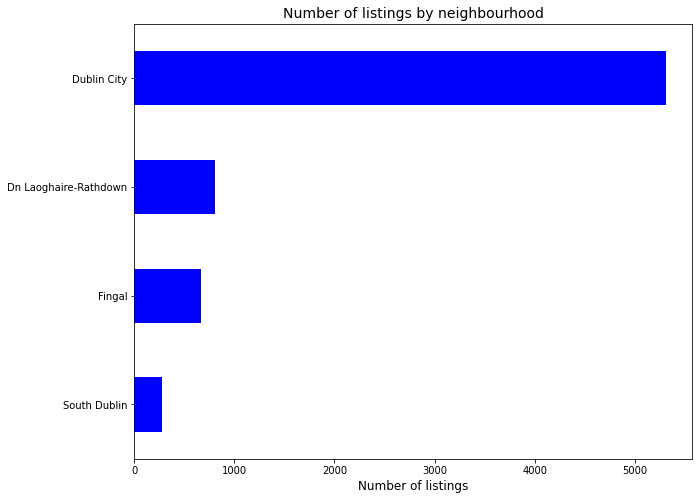

In [10]:
#Seeing which neighbourhood has the highest number of listings
feq = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

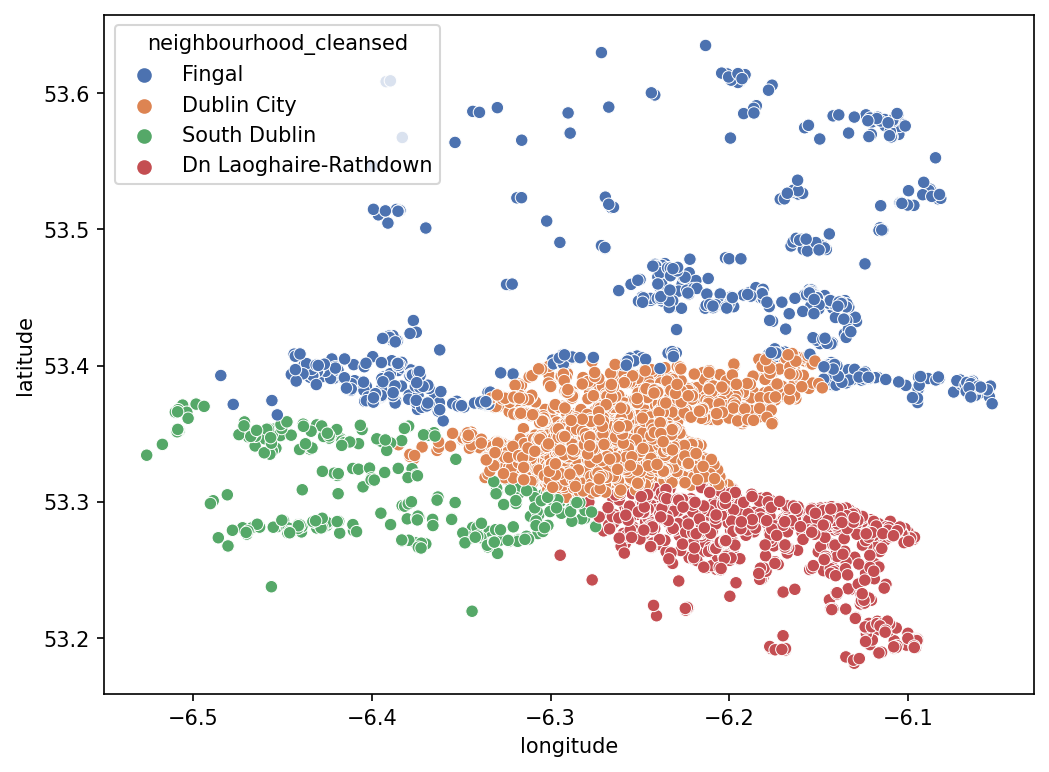

In [11]:
#Creating a scatterplot for the listings
plt.figure(figsize=(8,6), dpi = 150)
sns.scatterplot(data=listings, x="longitude", y="latitude", hue="neighbourhood_cleansed", palette="deep",  sizes=(20, 200), legend="full")

In [ ]:
# As it turns out, Dublin City has the highest number of listings followed by Dn Laoghaire-Rathdown. Now, let us compare the average prices by neighbourhood

In [12]:
#Comparing the average prices by neighbourhood
listings.groupby(
    ["neighbourhood_cleansed"], as_index=False
).agg(
    avg_price = ("price", "mean"),
    qty = ("price", "count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)

,neighbourhood_cleansed,avg_price,qty
0,Dublin City,388.046704,5310
1,Fingal,143.278027,669
2,Dn Laoghaire-Rathdown,136.550311,805
3,South Dublin,100.589286,280


In [ ]:
# Booking a room in Dn Laoghaire-Rathdown or Fingal seems to be much cheaper than Dublin City. But the price of a room also depends on 
# factors such as the type of property and the number of guests. Let us explore them as follows:

In [13]:
## the types of properties available
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

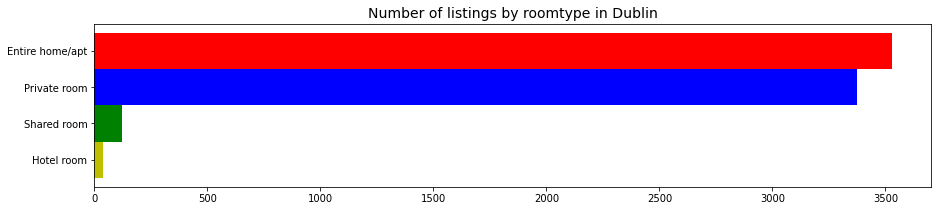

In [14]:
#Plotting a histogram to compare the number of listings by roomtype
freq = listings['room_type'].value_counts().sort_values(ascending=True)

freq.plot.barh(figsize =(15,3), width=1, color=['y','g','b','r'])

#We give four different colours for our graphs
plt.title("Number of listings by roomtype in Dublin", fontsize=14)
plt.show()

In [ ]:
# Entire Home/Apartments and Private rooms are relatively higher than shared rooms and hotel rooms. This could mean the city has travelers 
# mostly travelling in the fom of groups, couples or solo travlers. Let us see the number of people per booking in Dublin AirBnbs:

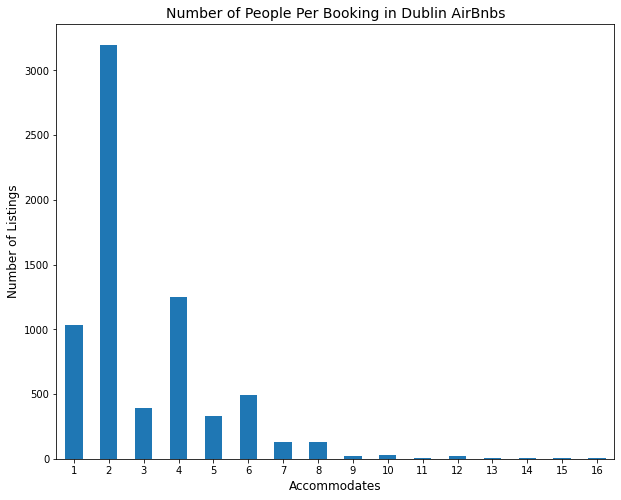

In [17]:
#Visualizing the number of listings according to the guests they accommodate
feq = listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of People Per Booking in Dublin AirBnbs', fontsize=14)
plt.ylabel('Number of Listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [ ]:
# Moving forward we plot a hisogram to see the price distribution. I've taken the log values of prices and removed the zeroes, if any. Note that logarithmic price scales
# are a type of scale used on a chart, plotted such that two equivalent price changes are represented by the same vertical changes on the scale.

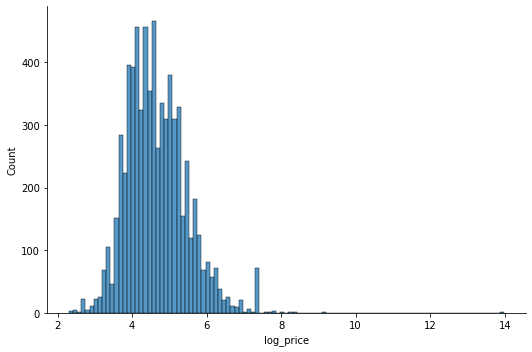

In [25]:
listings = listings[listings.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)

In [ ]:
#As apparent, there seems to be log-normal distribution here. Lastly, do the prices have any relation to the corresponding accommodate values?

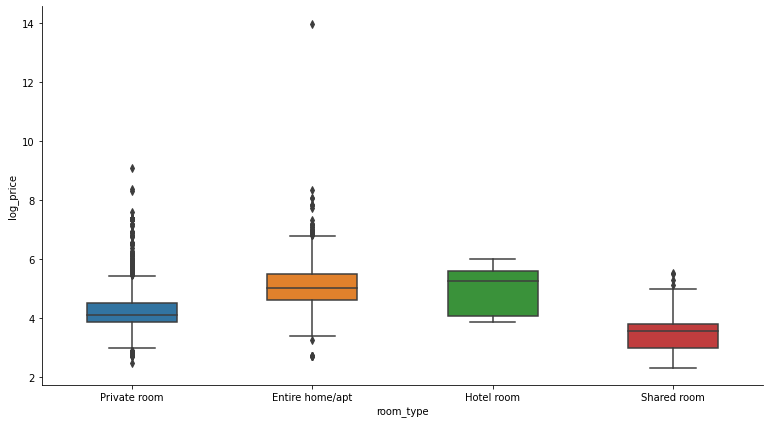

In [26]:
# Plotting another boxplot to see how prices vary according to the type of the airbnb
sns.catplot(
    data=listings, 
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [ ]:
# There are a lot of outliers in the private room category probably due to them being located in the city centre. Hotel rooms and entre home apartments are
# relatively expensive.
